In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

In [4]:
# loading the datasets

In [5]:
df = pd.read_csv("kc_house_data.csv")

In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [7]:
# with heatmap

In [8]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [10]:
# data visua;ization

C:\Users\jawah\anaconda3\envs\py37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

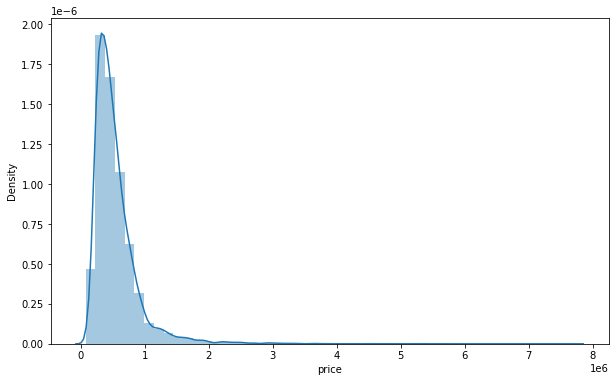

In [11]:
# price 

plt.figure(figsize=(10,6))
sns.distplot(df["price"])

C:\Users\jawah\anaconda3\envs\py37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

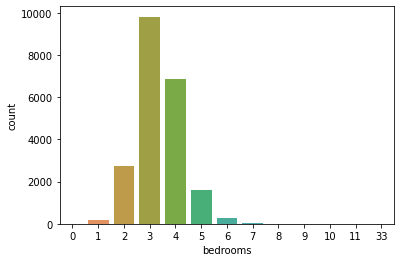

In [12]:
# bedrooms

sns.countplot(df["bedrooms"])

In [13]:

df.corr()["price"].sort_values()

zipcode         -0.053203
id              -0.016762
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308350
sqft_basement    0.323816
view             0.397293
bathrooms        0.525138
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

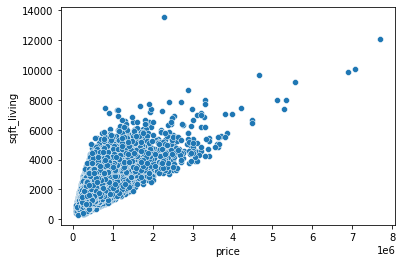

In [14]:
# their correlations :

sns.scatterplot(x="price",y="sqft_living", data = df)

In [15]:
# lat and long

In [16]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

<AxesSubplot:xlabel='price', ylabel='lat'>

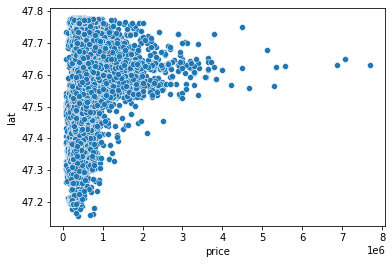

In [17]:
# see their are no corr that much...

sns.scatterplot(x="price", y="lat", data = df)

<AxesSubplot:xlabel='long', ylabel='lat'>

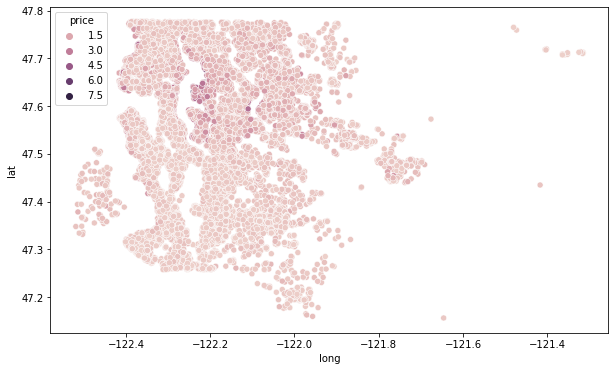

In [18]:
plt.figure(figsize=(10,6))
sns.scatterplot(x="long",y="lat",data=df, hue="price")

In [19]:
# remove the outlier

df.sort_values("price",ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1315,7558700030,20150413T000000,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1164,1247600105,20141020T000000,5110800.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8092,1924059029,20140617T000000,4668000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2626,7738500731,20140815T000000,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8638,3835500195,20140618T000000,4489000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [20]:
# because the expensive house make the price high, so removing one percent of expensive house

# one percent in the dataframe

len(df)*0.01

216.13

In [21]:
# by removing the top 1 % from the df

non_top_1_percent = df.sort_values(["price"],ascending=False).iloc[216:]

<AxesSubplot:xlabel='long', ylabel='lat'>

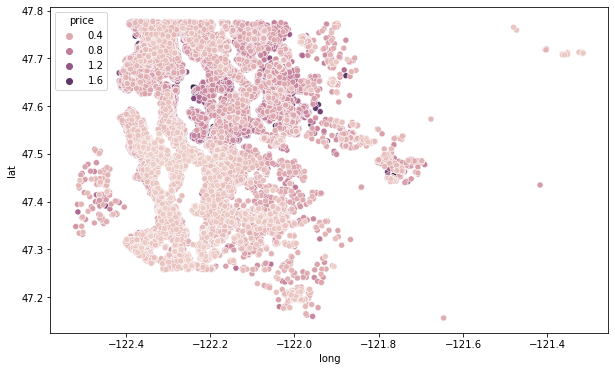

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = "long",y = "lat",data = non_top_1_percent,hue="price")

In [23]:
# it shows that expensive house are in waterfront


<AxesSubplot:xlabel='waterfront', ylabel='price'>

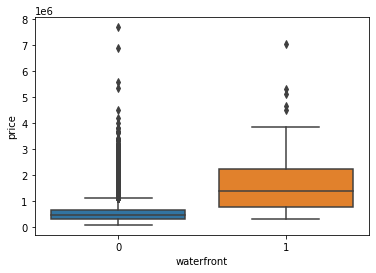

In [24]:
sns.boxplot(x="waterfront", y= "price", data = df)

In [25]:
# removing the id columns

In [36]:
df = df[df.columns[1:]]

In [38]:

df["date"] = pd.to_datetime(df["date"])

C:\Users\jawah\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
# function for month separate

def time_to_month(var):
    return var.month

# function for year separate

def time_to_year(var):
    return var.year

df["month"] = df["date"].apply(time_to_month)
df["year"] = df["date"].apply(time_to_year)

In [53]:
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,2009,0,98103,47.6993,-122.346,1530,1509,5,2014
21609,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2,2015
21610,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,0,2009,0,98144,47.5944,-122.299,1020,2007,6,2014
21611,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,0,2004,0,98027,47.5345,-122.069,1410,1287,1,2015


<AxesSubplot:>

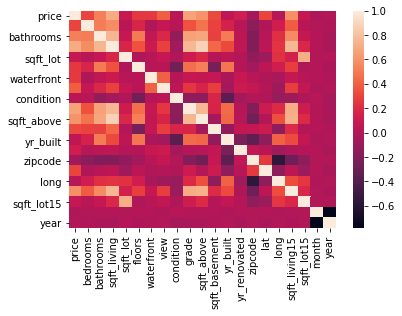

In [57]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='month', ylabel='price'>

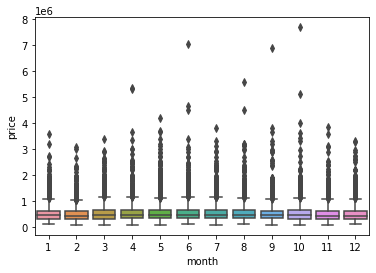

In [58]:
# check year and month are useful feature

sns.boxplot(x="month", y="price", data= df)

<AxesSubplot:xlabel='month'>

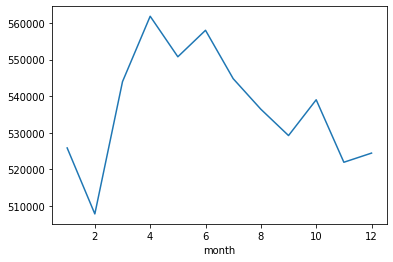

In [61]:
df.groupby("month").mean()["price"].plot()

<AxesSubplot:xlabel='year'>

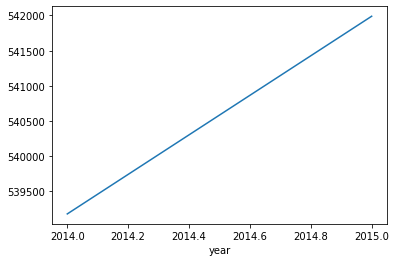

In [63]:
# for year

df.groupby("year").mean()["price"].plot()

In [65]:
# drop date

df.drop("date",axis = 1,inplace = True)

In [67]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2,2015


In [68]:
# zipcode is not useful feature

In [69]:
# drop zipcode

df.drop("zipcode",axis = 1,inplace = True)

In [70]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


In [71]:
# let see year renovated

In [73]:
df["yr_renovated"].value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [83]:


df[["yr_renovated","price"]][df["yr_renovated"]>=1]

,yr_renovated,price
1,1991,538000.0
35,2002,696000.0
95,1991,905000.0
103,2010,1088000.0
115,1999,740500.0
...,...,...
19622,1960,1150000.0
20057,2006,434900.0
20444,2009,500012.0
20447,2014,356999.0


In [99]:
df[["price","bedrooms"]][df["price"] >= df["price"].mean()]

,price,bedrooms
3,604000.0,4
5,1225000.0,4
10,662500.0,3
15,650000.0,4
21,2000000.0,3
...,...,...
21598,541800.0,4
21599,810000.0,4
21600,1537000.0,5
21605,610685.0,4


In [102]:
# done with feature engineerings

X = df.drop("price",axis=1).values
y = df["price"].values

In [104]:
X.shape , y.shape

((21613, 19), (21613,))

In [106]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [107]:
X_train.shape, X_test.shape

((15129, 19), (6484, 19))

In [108]:
# scaling the values

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()


In [109]:

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [112]:
# create the model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [114]:
model = Sequential([
    
    Dense(19,activation = "relu"),
    Dense(19,activation = "relu"),
    Dense(19,activation = "relu"),
    Dense(19,activation = "relu"),
    Dense(1),
])

model.compile( 
    optimizer="adam",
    loss = "mse"
)

In [120]:
model.fit(x = X_train_scaled, y=y_train, validation_data = (X_test_scaled, y_test), batch_size = 128, epochs = 400)

Epoch 1/400
119/119 [==============================] - 0s 4ms/step - loss: 28011636736.0000 - val_loss: 28151326720.0000
Epoch 2/400
119/119 [==============================] - 0s 4ms/step - loss: 27983114240.0000 - val_loss: 28124612608.0000
Epoch 3/400
119/119 [==============================] - 0s 4ms/step - loss: 27979472896.0000 - val_loss: 28091234304.0000
Epoch 4/400
119/119 [==============================] - 0s 3ms/step - loss: 28000647168.0000 - val_loss: 28092547072.0000
Epoch 5/400
119/119 [==============================] - 0s 4ms/step - loss: 27932303360.0000 - val_loss: 28068851712.0000
Epoch 6/400
119/119 [==============================] - 0s 4ms/step - loss: 27941607424.0000 - val_loss: 28141117440.0000
Epoch 7/400
119/119 [==============================] - 0s 4ms/step - loss: 27909697536.0000 - val_loss: 28048410624.0000
Epoch 8/400
119/119 [==============================] - 0s 3ms/step - loss: 27900221440.0000 - val_loss: 28008951808.0000
Epoch 9/400
119/119 [===========

119/119 [==============================] - 0s 3ms/step - loss: 26991691776.0000 - val_loss: 27398678528.0000
Epoch 69/400
119/119 [==============================] - 0s 4ms/step - loss: 26974713856.0000 - val_loss: 27351273472.0000
Epoch 70/400
119/119 [==============================] - 0s 3ms/step - loss: 26972270592.0000 - val_loss: 27345782784.0000
Epoch 71/400
119/119 [==============================] - 0s 3ms/step - loss: 26923089920.0000 - val_loss: 27348553728.0000
Epoch 72/400
119/119 [==============================] - 0s 3ms/step - loss: 26926899200.0000 - val_loss: 27389544448.0000
Epoch 73/400
119/119 [==============================] - 0s 3ms/step - loss: 26907797504.0000 - val_loss: 27353354240.0000
Epoch 74/400
119/119 [==============================] - 0s 3ms/step - loss: 26883002368.0000 - val_loss: 27353413632.0000
Epoch 75/400
119/119 [==============================] - 0s 4ms/step - loss: 26883874816.0000 - val_loss: 27392677888.0000
Epoch 76/400
119/119 [===============

Epoch 135/400
119/119 [==============================] - 0s 3ms/step - loss: 26337544192.0000 - val_loss: 27070687232.0000
Epoch 136/400
119/119 [==============================] - 0s 3ms/step - loss: 26380718080.0000 - val_loss: 26933630976.0000
Epoch 137/400
119/119 [==============================] - 0s 3ms/step - loss: 26345469952.0000 - val_loss: 26988548096.0000
Epoch 138/400
119/119 [==============================] - 0s 3ms/step - loss: 26323789824.0000 - val_loss: 26931548160.0000
Epoch 139/400
119/119 [==============================] - 0s 3ms/step - loss: 26308616192.0000 - val_loss: 26946715648.0000
Epoch 140/400
119/119 [==============================] - 0s 3ms/step - loss: 26293270528.0000 - val_loss: 26954196992.0000
Epoch 141/400
119/119 [==============================] - 0s 3ms/step - loss: 26301413376.0000 - val_loss: 26957355008.0000
Epoch 142/400
119/119 [==============================] - 0s 3ms/step - loss: 26289305600.0000 - val_loss: 26941947904.0000
Epoch 143/400
11

119/119 [==============================] - 0s 3ms/step - loss: 25895763968.0000 - val_loss: 26771105792.0000
Epoch 202/400
119/119 [==============================] - 0s 3ms/step - loss: 25871370240.0000 - val_loss: 26723807232.0000
Epoch 203/400
119/119 [==============================] - 0s 3ms/step - loss: 25867386880.0000 - val_loss: 26784370688.0000
Epoch 204/400
119/119 [==============================] - 0s 3ms/step - loss: 25869576192.0000 - val_loss: 26796122112.0000
Epoch 205/400
119/119 [==============================] - 0s 4ms/step - loss: 25864740864.0000 - val_loss: 26725558272.0000
Epoch 206/400
119/119 [==============================] - 0s 4ms/step - loss: 25896820736.0000 - val_loss: 26771939328.0000
Epoch 207/400
119/119 [==============================] - 0s 4ms/step - loss: 25849016320.0000 - val_loss: 26708244480.0000
Epoch 208/400
119/119 [==============================] - 0s 4ms/step - loss: 25863884800.0000 - val_loss: 26763083776.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 25568993280.0000 - val_loss: 26650454016.0000
Epoch 268/400
119/119 [==============================] - 0s 3ms/step - loss: 25601474560.0000 - val_loss: 26608529408.0000
Epoch 269/400
119/119 [==============================] - 0s 3ms/step - loss: 25584418816.0000 - val_loss: 26639648768.0000
Epoch 270/400
119/119 [==============================] - 0s 3ms/step - loss: 25529630720.0000 - val_loss: 26600165376.0000
Epoch 271/400
119/119 [==============================] - 0s 3ms/step - loss: 25517574144.0000 - val_loss: 26626201600.0000
Epoch 272/400
119/119 [==============================] - 0s 4ms/step - loss: 25527189504.0000 - val_loss: 26660732928.0000
Epoch 273/400
119/119 [==============================] - 0s 3ms/step - loss: 25518893056.0000 - val_loss: 26653743104.0000
Epoch 274/400
119/119 [==============================] - 0s 3ms/step - loss: 25502085120.0000 - val_loss: 26659287040.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 4ms/step - loss: 25347526656.0000 - val_loss: 26630000640.0000
Epoch 334/400
119/119 [==============================] - 0s 3ms/step - loss: 25343133696.0000 - val_loss: 26607620096.0000
Epoch 335/400
119/119 [==============================] - 0s 3ms/step - loss: 25352769536.0000 - val_loss: 26584135680.0000
Epoch 336/400
119/119 [==============================] - 0s 3ms/step - loss: 25324795904.0000 - val_loss: 26597498880.0000
Epoch 337/400
119/119 [==============================] - 0s 3ms/step - loss: 25296515072.0000 - val_loss: 26600724480.0000
Epoch 338/400
119/119 [==============================] - 0s 3ms/step - loss: 25333467136.0000 - val_loss: 26677852160.0000
Epoch 339/400
119/119 [==============================] - 0s 3ms/step - loss: 25301409792.0000 - val_loss: 26687639552.0000
Epoch 340/400
119/119 [==============================] - 0s 4ms/step - loss: 25281112064.0000 - val_loss: 26671716352.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 3ms/step - loss: 25086332928.0000 - val_loss: 26979213312.0000
Epoch 400/400
119/119 [==============================] - 0s 3ms/step - loss: 25138790400.0000 - val_loss: 26729662464.0000


<AxesSubplot:>

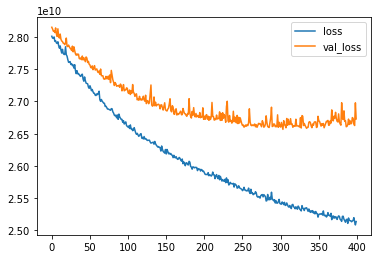

In [121]:
pd.DataFrame(model.history.history).plot()

In [122]:
# evaluations 
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [123]:
prediction = model.predict(X_test_scaled)

In [124]:
mean_squared_error(y_test, prediction)

26729665243.416275

In [125]:
np.sqrt(mean_squared_error(y_test, prediction))

163492.09535453471

In [126]:
mean_absolute_error(y_test, prediction)

100612.1701833359

In [137]:
# let see the price mean

df["price"].mean() , prediction.mean()

(540088.1417665294, 544462.94)

In [130]:
explained_variance_score(y_test, prediction)

0.809527795427138

In [131]:
# so now we need to lower the loss


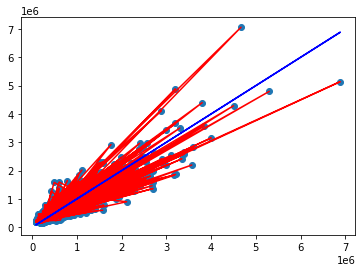

In [136]:
plt.scatter(y_test,prediction)
plt.plot(y_test,prediction,"r")
plt.plot(y_test,y_test,"b")

In [ ]:
df